Model Accuracy: 0.6519337016574586
یہ ایک بلی ہے۔


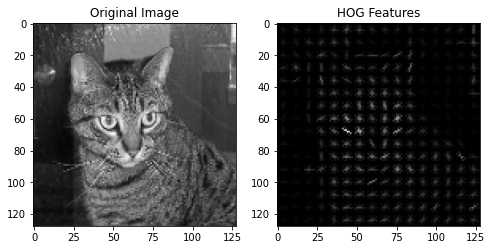

In [28]:
# ضروری لائبریریاں امپورٹ کریں
import cv2  # تصاویر لوڈ اور پروسیس کرنے کے لیے
import os  # فولڈرز اور فائلوں کو مینیج کرنے کے لیے
import numpy as np  # نمبرز اور میٹرکسز کے ساتھ کام کرنے کے لیے
from skimage.feature import hog  # HOG فیچرز نکالنے کے لیے
from sklearn.model_selection import train_test_split  # ڈیٹا کو ٹرین اور ٹیسٹ میں تقسیم کرنے کے لیے
from sklearn.svm import SVC  # SVM ماڈل بنانے کے لیے
import matplotlib.pyplot as plt  # تصاویر کو دکھانے کے لیے

# ڈیٹا لوڈ کرنے کا فنکشن
def load_images_from_folder(folder, label):
    images = []  # تصاویر کو اسٹور کرنے کے لیے ایک لسٹ
    labels = []  # تصاویر کی کلاسز (بلی یا کتا) اسٹور کرنے کے لیے ایک لسٹ
    for filename in os.listdir(folder):  # فولڈر کے اندر موجود تمام فائلز پر لوپ لگائیں
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)  # تصویر کو گرے اسکیل میں لوڈ کریں
        if img is not None:  # اگر تصویر صحیح طریقے سے لوڈ ہو جائے
            img = cv2.resize(img, (128, 128))  # تصویر کو 128x128 کے سائز میں تبدیل کریں
            images.append(img)  # تصویر کو لسٹ میں شامل کریں
            labels.append(label)  # لیبل (0 = بلی، 1 = کتا) کو لسٹ میں شامل کریں
    return images, labels  # تصاویر اور لیبلز واپس کریں

# بلی اور کتے کے فولڈرز سے ڈیٹا لوڈ کریں
cat_images, cat_labels = load_images_from_folder('SVMDATASET/Cat', 0)  # 0 = بلی کے لیے لیبل
dog_images, dog_labels = load_images_from_folder('SVMDATASET/Dog', 1)  # 1 = کتے کے لیے لیبل

# ڈیٹا کو کمبائن کریں
images = np.array(cat_images + dog_images)  # تمام تصاویر کو ایک لسٹ میں جوڑیں
labels = np.array(cat_labels + dog_labels)  # تمام لیبلز کو ایک لسٹ میں جوڑیں

# HOG فیچرز نکالنے کا فنکشن
def extract_hog_features(images):
    hog_features = []  # HOG فیچرز کو اسٹور کرنے کے لیے ایک لسٹ
    for img in images:  # ہر تصویر پر لوپ لگائیں
        features = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                       cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)  # HOG فیچرز نکالیں
        hog_features.append(features)  # فیچرز کو لسٹ میں شامل کریں
    return np.array(hog_features)  # HOG فیچرز کو NumPy array میں تبدیل کریں

# HOG فیچرز نکالیں
hog_features = extract_hog_features(images)

# ڈیٹا کو ٹریننگ اور ٹیسٹنگ میں تقسیم کریں
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# SVM ماڈل بنائیں
svm_model = SVC(kernel='linear')  # SVM ماڈل بنانے کے لیے 'linear' kernel استعمال کریں

# ماڈل کو ٹرین کریں
svm_model.fit(X_train, y_train)  # ٹریننگ ڈیٹا پر ماڈل کو ٹرین کریں

# ماڈل کی کارکردگی چیک کریں
accuracy = svm_model.score(X_test, y_test)  # ٹیسٹنگ ڈیٹا پر ماڈل کی کارکردگی کو چیک کریں
print("Model Accuracy:", accuracy)  # درستگی پرنٹ کریں

# نئی تصویر لوڈ کریں
new_image = cv2.imread('SVMDATASET/Cat/cat.1.jpg', cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (128, 128))

# HOG فیچرز نکالیں
new_features = hog(new_image, orientations=9, pixels_per_cell=(8, 8), 
                   cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False).reshape(1, -1)

# پیشگوئی کریں
prediction = svm_model.predict(new_features)
if prediction == 0:
    print("یہ ایک بلی ہے۔")
else:
    print("یہ ایک کتا ہے۔")

# HOG فیچرز کی ویژولائزیشن
def show_hog_features(image):
    # HOG فیچرز کا ویژولائزیشن دکھائیں
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    
    plt.figure(figsize=(8, 6))
    plt.subplot(121)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Original Image')
    
    plt.subplot(122)
    plt.imshow(hog_image, cmap=plt.cm.gray)
    plt.title('HOG Features')
    
    plt.show()

# HOG فیچرز کی ویژولائزیشن
show_hog_features(new_image)


#just change the image in new_image like cat cat.2.jpg

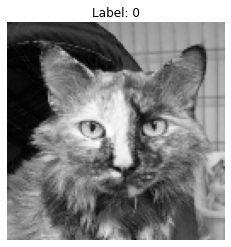

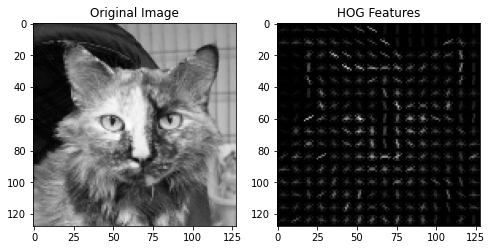

In [30]:
# بلی اور کتے کی ایک تصویر کو دکھائیں
index = 2  # آپ یہاں اپنی مرضی سے کسی بھی تصویر کا انڈیکس منتخب کر سکتے ہیں
show_image_with_label(images[index], labels[index])  # تصویر اور اس کا لیبل دکھائیں

# اس تصویر کے HOG فیچرز کو دکھائیں
show_hog_features(images[index])  # HOG فیچرز دکھائیں


# just chnage the index like 3 or 2 or 1 and run the code.